An example notebook to demonstrate plotting issues.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Define a `pandas.DataFrame` with some data.  This would work with `numpy.array` or `list` objects but I'll continue with a DataFrame.

In [3]:
x = np.random.rand(10)
df = pd.DataFrame({'min': x-1, 'max': x+1, 'mean': x}, index=pd.date_range('2000-01-01', periods=10, freq='AS'))
df

,min,max,mean
2000-01-01,-0.197461,1.802539,0.802539
2001-01-01,-0.492874,1.507126,0.507126
2002-01-01,-0.118324,1.881676,0.881676
2003-01-01,-0.867445,1.132555,0.132555
2004-01-01,-0.362219,1.637781,0.637781
2005-01-01,-0.777744,1.222256,0.222256
2006-01-01,-0.773549,1.226451,0.226451
2007-01-01,-0.210587,1.789413,0.789413
2008-01-01,-0.231364,1.768636,0.768636
2009-01-01,-0.772699,1.227301,0.227301


In notebooks, I think plot commands need to be run in one cell.  Notebooks (by default, I think) display plots automatically when the cell is executed (SHIFT-ENTER).  This is effectively the same as `plt.show()`.  So splitting plot calls over several cells will have the same results as putting `plt.show()` in the middle of plot calls.  So the following is what you sent as a screenshot. 

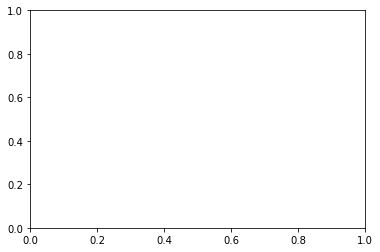

In [4]:
fig, ax = plt.subplots()

In [5]:
ax.fill_between(df['min'], df['max'], df.index, alpha=0.5)

In [6]:
ax.plot(df['mean'])

...but is you combine those cells.  Then it should work.

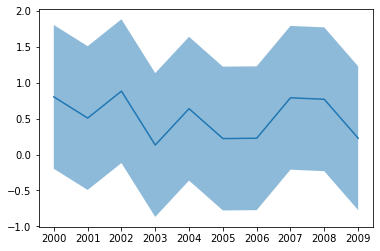

In [10]:
fig, ax = plt.subplots()
ax.fill_between(df.index, df['min'], df['max'], alpha=0.5)
ax.plot(df.index, df['mean'])

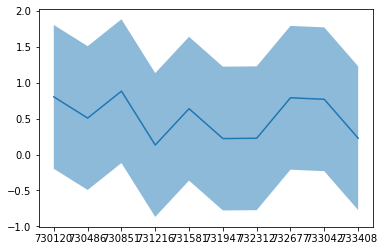

In [21]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.fill_between(df.index, df['min'], df['max'], alpha=0.5)
ax.plot(df.index, df['mean'])
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))